In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import json
import scipy.stats as stats

In [2]:
df1 = pd.read_csv("./data/personal_train.csv", index_col=0)
df2 = pd.read_csv("./data/other_train.csv", index_col=0)

In [3]:
#moje su len vo vacsom dataframe
attributes_marcel = ["marital-status", "pregnant", "relationship", "education", "education-num", "occupation", 
                     "income", "fnlwgt", "workclass", "hours-per-week", "capital-gain", "capital-loss", "medical_info", 
                     "class"]

In [4]:
data = df2[attributes_marcel]
data.head()

,marital-status,pregnant,relationship,education,education-num,occupation,income,fnlwgt,workclass,hours-per-week,capital-gain,capital-loss,medical_info,class
0,Married-civ-spouse,f,Husband,Bachelors,13.0,Sales,>50K,116358.0,Self-emp-inc,50.0,0.0,0.0,"{'mean_oxygen':'1.059364548','std_oxygen':'10....",0.0
1,Never-married,f,Own-child,Some-college,10.0,?,<=50K,243190.0,?,40.0,0.0,0.0,"{'mean_oxygen':'2.557692308','std_oxygen':'14....",0.0
2,Divorced,f,Unmarried,HS-grad,9.0,Other-service,<=50K,96840.0,Private,40.0,0.0,0.0,"{'mean_oxygen':'1.549331104','std_oxygen':'14....",0.0
3,Married-civ-spouse,f,Husband,Bachelors,13.0,Craft-repair,>50K,180439.0,Private,40.0,0.0,0.0,"{'mean_oxygen':'197.2341137','std_oxygen':'63....",0.0
4,Married-civ-spouse,f,Husband,Some-college,10.0,?,<=50K,115745.0,?,40.0,0.0,0.0,"{'mean_oxygen':'1.617056856','std_oxygen':'16....",0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   marital-status  3969 non-null   object 
 1   pregnant        3973 non-null   object 
 2   relationship    3965 non-null   object 
 3   education       3973 non-null   object 
 4   education-num   3972 non-null   float64
 5   occupation      3969 non-null   object 
 6   income          3972 non-null   object 
 7   fnlwgt          3969 non-null   float64
 8   workclass       3967 non-null   object 
 9   hours-per-week  3968 non-null   float64
 10  capital-gain    3970 non-null   float64
 11  capital-loss    3967 non-null   float64
 12  medical_info    3965 non-null   object 
 13  class           3965 non-null   float64
dtypes: float64(6), object(8)
memory usage: 466.8+ KB


In [6]:
data.isnull().sum()

marital-status    14
pregnant          10
relationship      18
education         10
education-num     11
occupation        14
income            11
fnlwgt            14
workclass         16
hours-per-week    15
capital-gain      13
capital-loss      16
medical_info      18
class             18
dtype: int64

In [7]:
missing = (data.isnull().sum() / data.shape[0])
missing

marital-status    0.003515
pregnant          0.002511
relationship      0.004519
education         0.002511
education-num     0.002762
occupation        0.003515
income            0.002762
fnlwgt            0.003515
workclass         0.004017
hours-per-week    0.003766
capital-gain      0.003264
capital-loss      0.004017
medical_info      0.004519
class             0.004519
dtype: float64

In [8]:
data.nunique()

marital-status       7
pregnant             6
relationship         6
education           16
education-num       16
occupation          26
income               4
fnlwgt            3677
workclass            9
hours-per-week      70
capital-gain        76
capital-loss        51
medical_info      3932
class                2
dtype: int64

# Analyza atributov

## Univariate Analyza

### y - prediction

In [9]:
data["class"].value_counts()

0.0    2953
1.0    1012
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

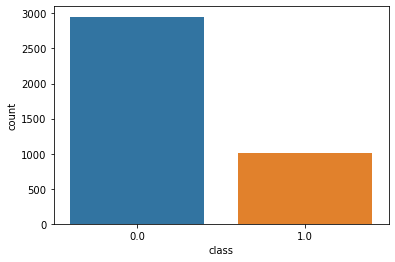

In [10]:
sns.countplot(data=data, x="class")

In [11]:
len(data[data["class"] == 1]) / len(data)

0.25407983931709766

In [12]:
def univariate_categ_to_class(data, categ_attr, cls="class", figsize=None):
    print(data[categ_attr].value_counts())
    
    
    if figsize is not None:
        plt.figure(figsize=figsize)
    
    sns.countplot(data=data, y=categ_attr, hue=cls)
    

In [13]:
def univariate_num(data, num_attr, figsize=None):
    print(data[num_attr].describe())
    
    print("Skewness:", stats.skew(data[num_attr], nan_policy="omit").data) 
    print("Kurtosis:", stats.kurtosis(data[num_attr], nan_policy="omit"))
        
    mean = data[num_attr].mean()
    median = data[num_attr].median()
    mode = data[num_attr].mode()[0]
    
    if figsize is not None:
        plt.figure(figsize=figsize)
    
    sns.boxplot(data=data, x=num_attr)
    plt.show()
    
    if figsize is not None:
        plt.figure(figsize=figsize)
    
    plt.axvline(mean, linestyle='-', label="mean")
    plt.axvline(median, linestyle='--', label="median")
    plt.axvline(mode, linestyle=':', label="mode")
    
    sns.distplot(data[num_attr], bins=20)
    plt.legend()
    plt.show()
    

In [14]:
def univariate_num_to_class(data, num_attr, cls="class", figsize=None):
 
    if figsize is not None:
        plt.figure(figsize=figsize)

    sns.violinplot(data=data, y=num_attr, x=cls)
    plt.show()

    if figsize is not None:
        plt.figure(figsize=figsize)
    
    sns.distplot(data[data[cls] == 0][num_attr], bins=20, label=cls+"0")
    sns.distplot(data[data[cls] == 1][num_attr], bins=20, label=cls+"1")
    plt.legend()
    plt.show()

#### marital-status

Pozor, je tam whitespace na zaciatku kazdej hodnoty... Teraz nas to avsak extra netrapi

In [15]:
data["marital-status"].unique()

array([' Married-civ-spouse', ' Never-married', ' Divorced', ' Separated',
       ' Widowed', ' Married-spouse-absent', nan, ' Married-AF-spouse'],
      dtype=object)

 Married-civ-spouse       1861
 Never-married            1257
 Divorced                  549
 Separated                 142
 Widowed                   116
 Married-spouse-absent      41
 Married-AF-spouse           3
Name: marital-status, dtype: int64


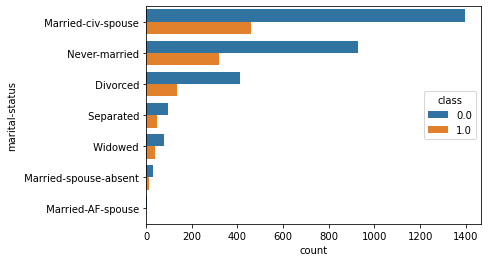

In [16]:
univariate_categ_to_class(data, "marital-status")

Pocet ludi s cukrovkou v jednotlivych kategoriach...

In [17]:
def get_percent_of_class_in_attr(data, attr, class_col="class", class_value=1):
    left = data[attr].value_counts().to_frame()
    right = data[data[class_col] == class_value][attr].value_counts().to_frame()

    lsuffix = "-total"
    rsuffix = "-" + class_col + str(class_value)
    
    leftname = attr + lsuffix
    rightname = attr + rsuffix
    
    joined = left.join(right, how="left", lsuffix=lsuffix, rsuffix=rsuffix).fillna(0)
    
    return (joined[rightname] / joined[leftname]).sort_values(ascending=False)

In [18]:
get_percent_of_class_in_attr(data, "marital-status")

 Separated                0.323944
 Widowed                  0.318966
 Married-spouse-absent    0.268293
 Never-married            0.253779
 Divorced                 0.247723
 Married-civ-spouse       0.247179
 Married-AF-spouse        0.000000
dtype: float64

#### pregnant

In [19]:
data["pregnant"].value_counts()

f        3516
FALSE     201
F         189
t          61
T           3
TRUE        3
Name: pregnant, dtype: int64

In [20]:
mask = data["pregnant"].notna()

In [21]:
pregnant_bool = data["pregnant"][mask].apply(lambda row: True if row != np.nan and re.match("^(t|T)", row) else False)
pregnant_bool = pregnant_bool.to_frame()

In [22]:
pregnant_bool.value_counts()

pregnant
False       3906
True          67
dtype: int64

<AxesSubplot:xlabel='pregnant', ylabel='count'>

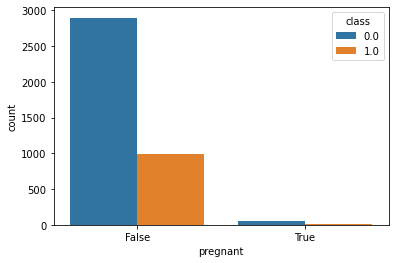

In [23]:
pregnant_data = pregnant_bool.join(data["class"], how="left")

sns.countplot(data=pregnant_data, x="pregnant", hue="class")

In [24]:
pregnant_data.value_counts()

pregnant  class
False     0.0      2898
          1.0       992
True      0.0        50
          1.0        17
dtype: int64

#### relationship

Dalsi whitespace na zaciatku stringov...

In [25]:
data["relationship"].unique()

array([' Husband', ' Own-child', ' Unmarried', ' Not-in-family', ' Wife',
       ' Other-relative', nan], dtype=object)

 Husband           1635
 Not-in-family      981
 Own-child          607
 Unmarried          429
 Wife               195
 Other-relative     118
Name: relationship, dtype: int64


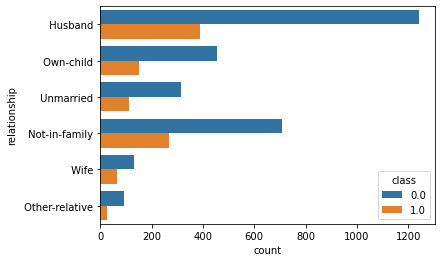

In [26]:
univariate_categ_to_class(data, "relationship")

In [27]:
get_percent_of_class_in_attr(data, "relationship")

 Wife              0.328205
 Not-in-family     0.271152
 Unmarried         0.261072
 Own-child         0.245470
 Husband           0.236697
 Other-relative    0.220339
dtype: float64

#### education

Asi by som to rozdelil do mensieho poctu kategorii...

Znova whitespace...

In [28]:
data["education"].unique()

array([' Bachelors', ' Some-college', ' HS-grad', ' 11th', ' 9th',
       ' Preschool', ' Assoc-acdm', ' Assoc-voc', ' Prof-school', ' 12th',
       ' Doctorate', ' 5th-6th', ' 10th', ' Masters', ' 7th-8th',
       ' 1st-4th', nan], dtype=object)

Teraz to rovno upravim, aby som nemusel pocitat s danou medzerou

In [29]:
data["education"] = data["education"].apply(lambda row: row.strip() if row is not np.nan else row)

data["education"].unique()

<ipython-input-29-558193ad8e6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["education"] = data["education"].apply(lambda row: row.strip() if row is not np.nan else row)


array(['Bachelors', 'Some-college', 'HS-grad', '11th', '9th', 'Preschool',
       'Assoc-acdm', 'Assoc-voc', 'Prof-school', '12th', 'Doctorate',
       '5th-6th', '10th', 'Masters', '7th-8th', '1st-4th', nan],
      dtype=object)

HS-grad         1328
Some-college     863
Bachelors        624
Masters          215
Assoc-voc        166
Assoc-acdm       158
11th             128
10th             119
7th-8th           89
Prof-school       68
12th              58
Doctorate         52
9th               47
5th-6th           36
1st-4th           16
Preschool          6
Name: education, dtype: int64


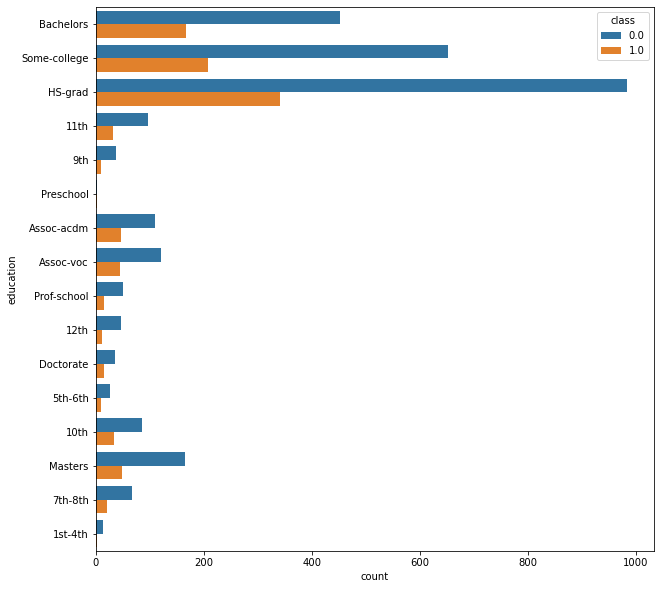

In [30]:
univariate_categ_to_class(data, "education", figsize=(10,10))

https://sites.google.com/site/complexdataminingproject/ - na tejto stranke su opisane niektore atributy, s ktorymi pracujeme

>  Preschool < 1st-4th < 5th-6th < 7th-8th < 9th < 10th < 11th < 12th < HS-grad < Prof-school < Assoc-acdm < Assoc-voc < Some-college < Bachelors < Masters < Doctorate. 

Deti malokedy mavaju cukrovku, tak kludne mozeme kategoriu Attending-school, co obsahuje preschool a skupinu K-12, co reprezentuje 12 rocnikov od elementary school po high school.

Tipujem, ze HS-grad znamena, ze dany clovek nepokracoval na vysoku skolu, takze to nechame ako samostatnu kategoriu.

Problemom vsak je, ze mame tu kategoriu some-college, ktora je dost zastupena, ale tak aj je napriklad kategoria Bachelor. Takze zatial nejdem mergovat kategorie pre vysokoskolske stupne

In [31]:
data["simple-edu"] = data["education"].copy()

<ipython-input-31-8ca6b411e47e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["simple-edu"] = data["education"].copy()


In [32]:
def simplify_education(row):
        
    edu = row["education"]
        
    if edu is np.nan:
        row["simple-edu"] = edu
        
    elif re.match("^([0-9][a-zA-Z])|(1[0-2][a-zA-Z])", edu) or edu == "Preschool":
        row["simple-edu"] = "Attending-school"
        
    elif edu in ["Assoc-acdm", "Assoc-voc", "Prof-school"]:
        row["simple-edu"] = "Edu after HS, no uni"
        
    elif edu in ["Masters", "Doctorate"]:
        row["simple-edu"] = "Masters/Doctorate"
        
    else:
        row["simple-edu"] = row["education"]
    
    return row
        
data = data.apply(simplify_education, axis=1)

HS-grad                 1328
Some-college             863
Bachelors                624
Attending-school         499
Edu after HS, no uni     392
Masters/Doctorate        267
Name: simple-edu, dtype: int64


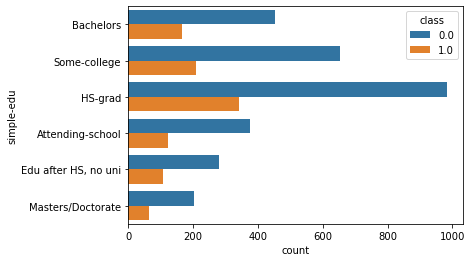

In [33]:
univariate_categ_to_class(data, "simple-edu")

In [34]:
get_percent_of_class_in_attr(data, "simple-edu")

Edu after HS, no uni    0.272959
Bachelors               0.267628
HS-grad                 0.256777
Attending-school        0.246493
Some-college            0.241020
Masters/Doctorate       0.235955
dtype: float64

#### education-num

count    3972.000000
mean       10.087865
std         2.541340
min         1.000000
25%         9.000000
50%        10.000000
75%        12.000000
max        16.000000
Name: education-num, dtype: float64
Skewness: -0.2753803626413893
Kurtosis: 0.6364151029333103


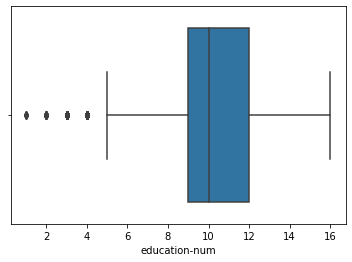

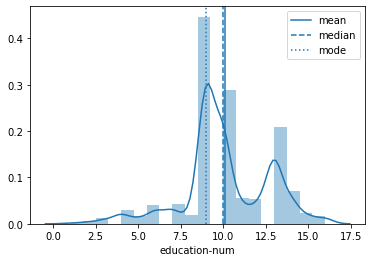

In [35]:
univariate_num(data, "education-num")

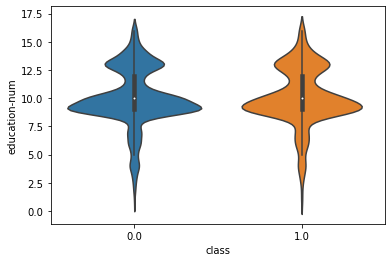

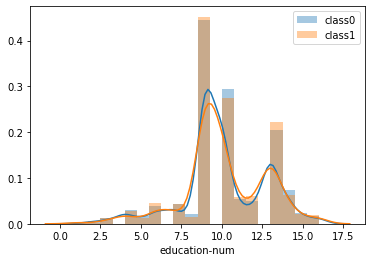

In [36]:
univariate_num_to_class(data, "education-num")

#### occupation

Je tam viacero duplicitnych hodnot, ktore su len zle zformatovane, tak, aby sme mali lepsiu predstavu o pocetnosti jednotlivych pravych hodnot, tak to treba trochu upravit...

In [37]:
print(data["occupation"].nunique())
data["occupation"].unique()

26


array([' Sales', ' ?', ' Other-service', ' Craft-repair',
       ' Handlers-cleaners', ' Machine-op-inspct', ' Exec-managerial',
       ' Adm_clerical', ' Handlers_cleaners', ' Transport-moving',
       ' Protective-serv', ' Tech-support', ' Adm-clerical',
       ' Prof-specialty', ' Farming-fishing', nan, ' Craft_repair',
       ' Prof_specialty', ' Exec_managerial', ' Transport_moving',
       ' Tech_support', ' Priv-house-serv', ' Protective_serv',
       ' Machine_op_inspct', ' Other_service', ' Farming_fishing',
       ' Armed-Forces'], dtype=object)

In [38]:
data["occupation"] = data["occupation"].apply(lambda row: np.nan if row is not np.nan and row.strip() == "?" else row)
data["occupation"] = data["occupation"].apply(lambda row: row.strip().replace("_", "-") if row is not np.nan else row)

print(data["occupation"].nunique())
data["occupation"].unique()

14


array(['Sales', nan, 'Other-service', 'Craft-repair', 'Handlers-cleaners',
       'Machine-op-inspct', 'Exec-managerial', 'Adm-clerical',
       'Transport-moving', 'Protective-serv', 'Tech-support',
       'Prof-specialty', 'Farming-fishing', 'Priv-house-serv',
       'Armed-Forces'], dtype=object)

Craft-repair         528
Prof-specialty       502
Exec-managerial      485
Adm-clerical         480
Sales                437
Other-service        403
Machine-op-inspct    243
Transport-moving     197
Handlers-cleaners    162
Tech-support         106
Farming-fishing      106
Protective-serv       73
Priv-house-serv       12
Armed-Forces           1
Name: occupation, dtype: int64


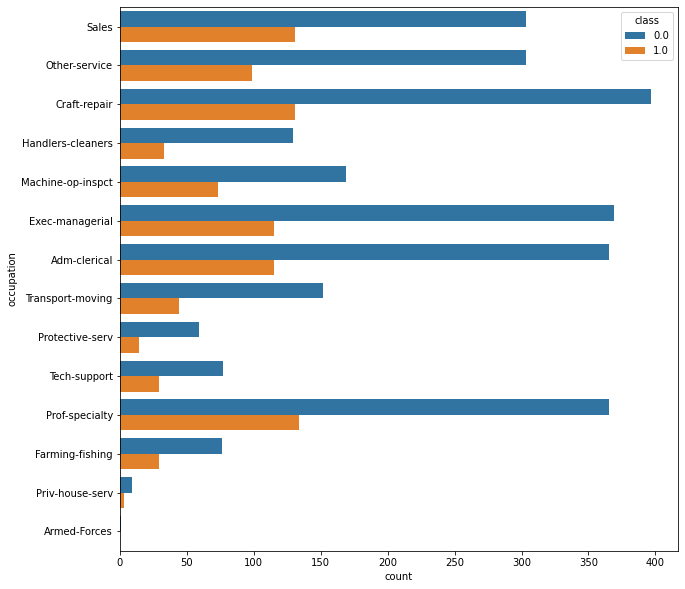

In [39]:
univariate_categ_to_class(data, "occupation", figsize=(10,10))

In [40]:
get_percent_of_class_in_attr(data, "occupation")

Machine-op-inspct    0.300412
Sales                0.299771
Farming-fishing      0.273585
Tech-support         0.273585
Prof-specialty       0.266932
Priv-house-serv      0.250000
Craft-repair         0.248106
Other-service        0.245658
Adm-clerical         0.239583
Exec-managerial      0.237113
Transport-moving     0.223350
Handlers-cleaners    0.203704
Protective-serv      0.191781
Armed-Forces         0.000000
dtype: float64

#### income

In [41]:
data["income"].unique()

array(['>50K', ' <=50K', ' >50K', '<=50K', nan], dtype=object)

In [42]:
data["income"] = data["income"].apply(lambda row: row.strip() if row is not np.nan else row)

data["income"].unique()

array(['>50K', '<=50K', nan], dtype=object)

<=50K    3002
>50K      970
Name: income, dtype: int64


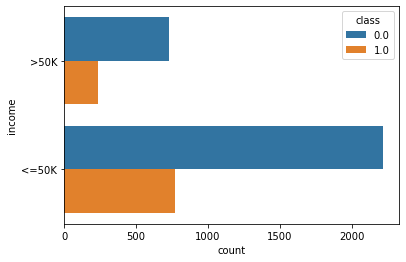

In [43]:
univariate_categ_to_class(data, "income")

In [44]:
get_percent_of_class_in_attr(data, "income")

<=50K    0.256496
>50K     0.246392
dtype: float64

#### fnlwgt

count      3969.000000
mean     188712.373898
std      102553.561943
min       19847.000000
25%      118551.000000
50%      178922.000000
75%      234743.000000
max      806316.000000
Name: fnlwgt, dtype: float64
Skewness: 1.1387625896901103
Kurtosis: 2.705120304969035


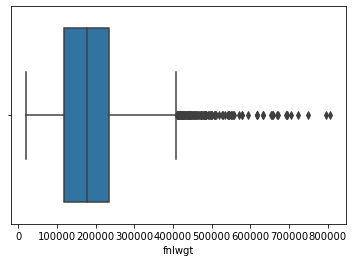

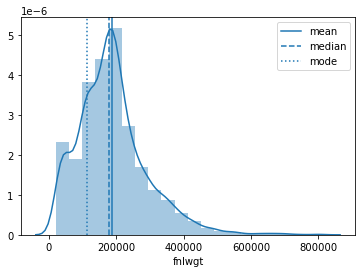

In [45]:
univariate_num(data, "fnlwgt")

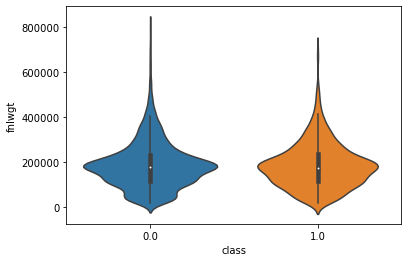

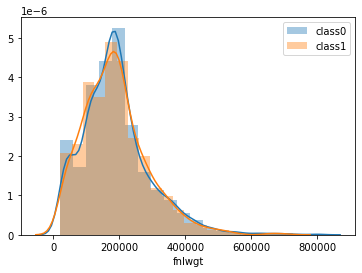

In [46]:
univariate_num_to_class(data, "fnlwgt")

#### workclass

In [47]:
data["workclass"].unique()

data["workclass"] = data["workclass"].apply(lambda row: row.strip() if row is not np.nan else row)
data["workclass"] = data["workclass"].apply(lambda row: np.nan if row == "?" else row)

data["workclass"].unique()

array(['Self-emp-inc', nan, 'Private', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Local-gov', 'Never-worked', 'Without-pay'],
      dtype=object)

Private             2782
Self-emp-not-inc     296
Local-gov            257
State-gov            145
Self-emp-inc         132
Federal-gov          119
Never-worked           2
Without-pay            1
Name: workclass, dtype: int64


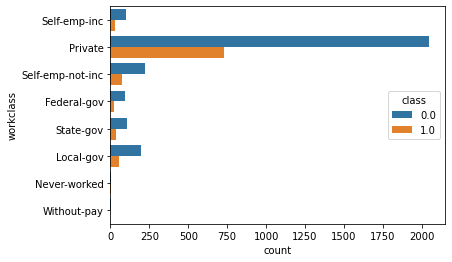

In [48]:
univariate_categ_to_class(data, "workclass")

In [49]:
get_percent_of_class_in_attr(data, "workclass")

Never-worked        0.500000
Private             0.262401
State-gov           0.262069
Self-emp-not-inc    0.243243
Federal-gov         0.218487
Local-gov           0.217899
Self-emp-inc        0.212121
Without-pay         0.000000
dtype: float64

#### hours-per-week

count    3968.000000
mean       40.323337
std        12.086865
min         2.000000
25%        40.000000
50%        40.000000
75%        45.000000
max        99.000000
Name: hours-per-week, dtype: float64
Skewness: 0.2478814975231514
Kurtosis: 2.888095246759577


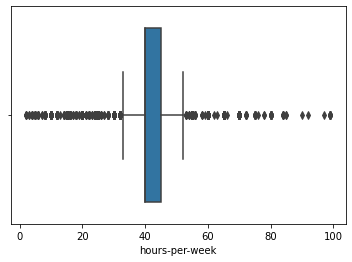

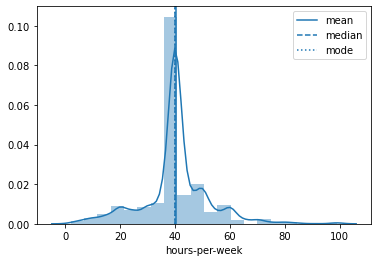

In [50]:
univariate_num(data, "hours-per-week")

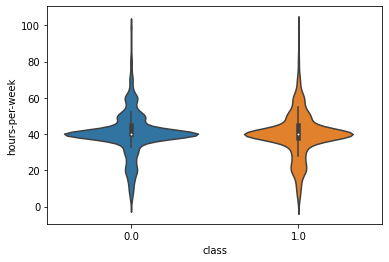

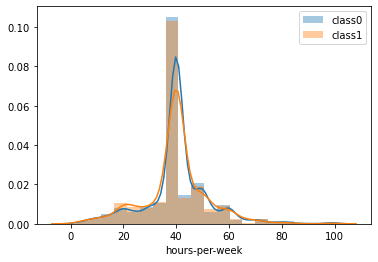

In [51]:
univariate_num_to_class(data, "hours-per-week")

#### capital-gain

<AxesSubplot:xlabel='capital-gain'>

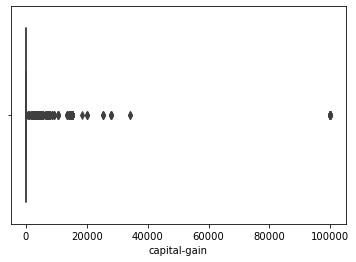

In [52]:
sns.boxplot(data["capital-gain"])

In [53]:
len(data)

3983

Ako mozno vidiet, toto sa ani neoplati rozoberat, lebo skoro vsetky zaznamy maju 0, co moze sice znamenat nieco, ale skor si myslim, ze len je to nejaka null hodnota

In [54]:
print(((data["capital-gain"] == 0) & (data["capital-loss"] == 0)).sum())
print(((data["capital-gain"] > 0) & (data["capital-loss"] == 0)).sum())
print(((data["capital-gain"] == 0) & (data["capital-loss"] > 0)).sum())

3452
318
185


In [55]:
print((data["capital-gain"] == 0).sum())
(data["capital-gain"] == 0).sum() / len(data)

3651


0.9166457444137585

Pre kompletnost mozem sa zaoberat tymi zaznamami, ktore su nenulove, no i ked by som tam nieco zaujimaveho nasiel, je tu velmi vela nulovych hodnot, ktore nemam ako optimalne vyplnit...

Rychlo este skontrolujeme, ci nahodou nie je nejaka zavislost medzi nulovymi hodnotami a prediction y, no pochybujem...
Ocakavame okolo 90% ludi z oboch kategorii, aby mali 0 capital-gain

In [56]:
print("Pocet cukrovkarov s capital-gain = 0:", len(data[(data["capital-gain"] == 0) & (data["class"] == 1)]))
print("Pocet nie-cukrovkarov s capital-gain = 0:", len(data[(data["capital-gain"] == 0) & (data["class"] == 0)]))

print("Pocet cukrovkarov:", (data["class"] == 1).sum())
print("Pocet nie-cukrovkarov:", (data["class"] == 0).sum())

Pocet cukrovkarov s capital-gain = 0: 940
Pocet nie-cukrovkarov s capital-gain = 0: 2694
Pocet cukrovkarov: 1012
Pocet nie-cukrovkarov: 2953


Obi dve hodnoty reprezentuju okolo 90% ludi z kazdej kategorie... Takze tam nie nic, ako sme ocakavali

In [57]:
no_zeros = data[data["capital-gain"] != 0]


count      319.000000
mean     12503.551724
std      21573.772145
min        594.000000
25%       3411.000000
50%       6723.000000
75%      13550.000000
max      99999.000000
Name: capital-gain, dtype: float64
Skewness: 3.545317021051369
Kurtosis: 11.537771038444975


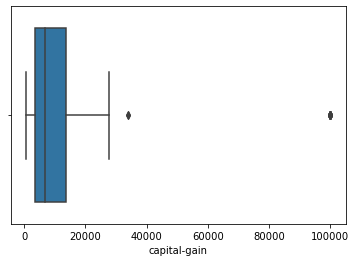

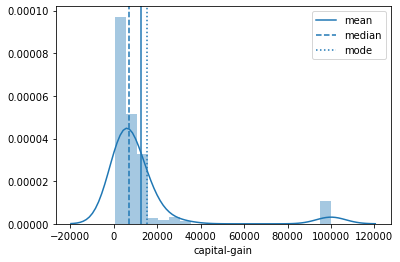

In [58]:
univariate_num(no_zeros, "capital-gain")

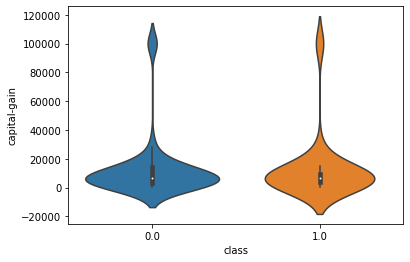

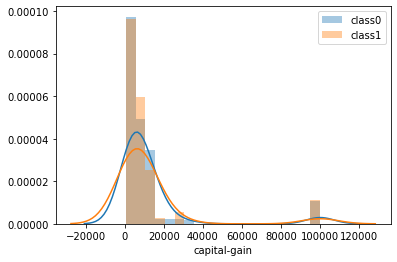

In [59]:
univariate_num_to_class(no_zeros, "capital-gain")

#### capital-loss

Ako pri capital-gain, je tu velke mnozstvo nul...

<AxesSubplot:xlabel='capital-loss'>

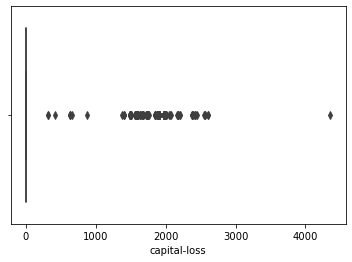

In [60]:
sns.boxplot(data=data, x="capital-loss")

In [61]:
print((data["capital-loss"] == 0).sum())
(data["capital-loss"] == 0).sum() / len(data)

3782


0.9495355259854381

In [62]:
print("Pocet cukrovkarov s capital-loss = 0:", len(data[(data["capital-loss"] == 0) & (data["class"] == 1)]))
print("Pocet nie-cukrovkarov s capital-loss = 0:", len(data[(data["capital-loss"] == 0) & (data["class"] == 0)]))

print("Pocet cukrovkarov:", (data["class"] == 1).sum())
print("Pocet nie-cukrovkarov:", (data["class"] == 0).sum())

Pocet cukrovkarov s capital-loss = 0: 963
Pocet nie-cukrovkarov s capital-loss = 0: 2806
Pocet cukrovkarov: 1012
Pocet nie-cukrovkarov: 2953


Znova 0 pre capital-loss nic neznamena, este sa pozrieme na nenulove hodnoty

In [63]:
no_zeros = data[data["capital-loss"] != 0]
len(no_zeros)

201

count     185.000000
mean     1830.464865
std       416.937150
min       323.000000
25%      1628.000000
50%      1887.000000
75%      1977.000000
max      4356.000000
Name: capital-loss, dtype: float64
Skewness: 0.1625630032149936
Kurtosis: 9.17948139722285


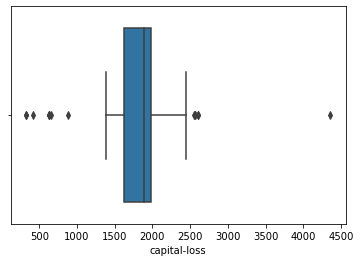

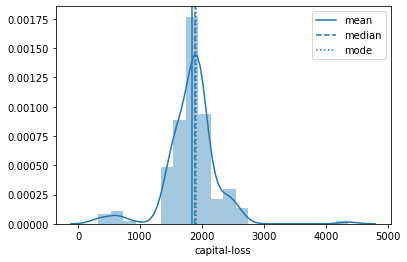

In [64]:
univariate_num(no_zeros, "capital-loss")

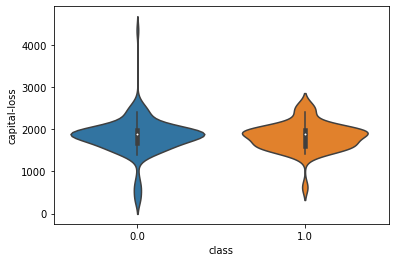

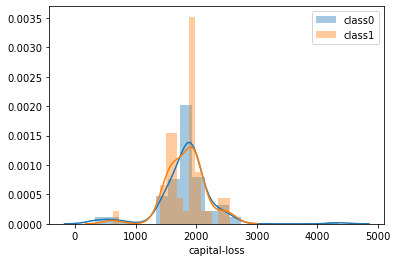

In [65]:
univariate_num_to_class(no_zeros, "capital-loss")

### medical_info

Ako mozno vidiet, tak v tomto atribute su skryte 4 atributy funkcie mnozstva kyslika, konkretne:
- mean
- std
- skewness
- kurtosis

Ma to tvar JSONu

In [66]:
data["mean_oxygen"] = np.nan
data["std_oxygen"] = np.nan
data["kurtosis_oxygen"] = np.nan
data["skewness_oxygen"] = np.nan

In [67]:
data["medical_info"].isna().sum()

18

In [68]:
def get_oxygen_stats(row):
    
    string = row["medical_info"]
    
    if string is np.nan:
        return row
    
    string = string.replace("\'", "\"")
    di = json.loads(string)
    
    for k in di.keys():
        row[k] = float(di[k])
        
    return row

data = data.apply(get_oxygen_stats, axis=1)

In [69]:
print("Pocet chybajucich merani:", data["medical_info"].isna().sum())

print(data["mean_oxygen"].isna().sum())
print(data["std_oxygen"].isna().sum())
print(data["kurtosis_oxygen"].isna().sum())
print(data["skewness_oxygen"].isna().sum())

Pocet chybajucich merani: 18
18
18
18
18


#### mean_oxygen

Z tychto chybajucich hodnot sa da vycitat, ze pokial existoval zaznam medical_info, tak vzdy obsahoval 4 hodnoty danych atributov, teda neboli zaznamy, ktore mali 3 a menej, inac by sme teraz ich nasli

count    3965.000000
mean       18.436913
std        34.699163
min         0.213211
25%         2.069398
50%         3.237458
75%        12.647993
max       217.371238
Name: mean_oxygen, dtype: float64
Skewness: 2.629338039722884
Kurtosis: 6.570659638187301


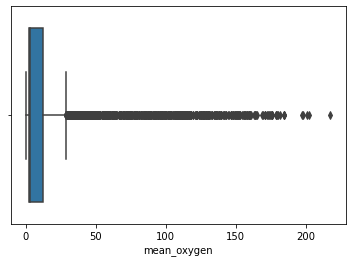

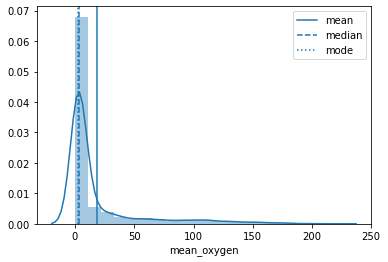

In [70]:
univariate_num(data, "mean_oxygen")

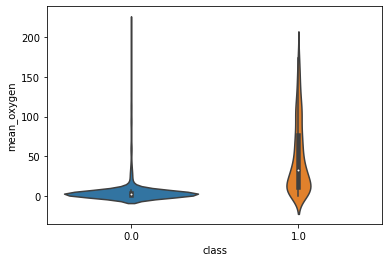

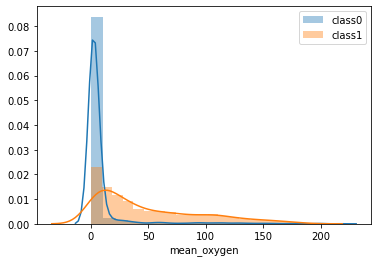

In [71]:
univariate_num_to_class(data, "mean_oxygen")

# HYPOTEZA

Uz z tychto diagramov mozeme vidiet, ze cukrovkary maju vacsie mnozstvo kyslika v krvi - HYPOTEZA
Nie-cukrovkari maju urcitu normalnu hladinu kysliku, ktora je okolo 8

In [72]:
data[data["class"] == 0]["mean_oxygen"].describe()

count    2940.000000
mean        7.949071
std        21.940569
min         0.213211
25%         1.840719
50%         2.604097
75%         4.148411
max       217.371238
Name: mean_oxygen, dtype: float64

In [73]:
data[data["class"] == 1]["mean_oxygen"].describe()

count    1008.000000
mean       49.150598
std        45.400305
min         0.486622
25%        12.120819
50%        32.540552
75%        77.149666
max       184.525920
Name: mean_oxygen, dtype: float64

#### std_oxygen

count    3965.000000
mean       31.174690
std        22.260027
min         7.370432
25%        15.065441
50%        20.594663
75%        43.253607
max       110.642211
Name: std_oxygen, dtype: float64
Skewness: 1.2001285748384394
Kurtosis: 0.22394821030145895


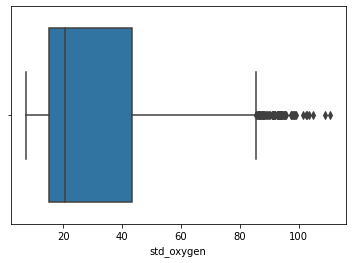

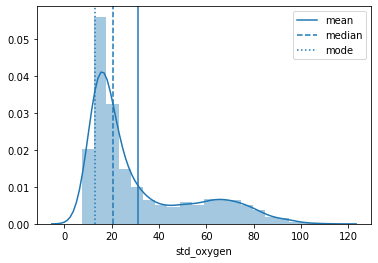

In [74]:
univariate_num(data, "std_oxygen")

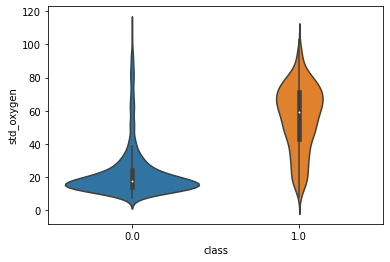

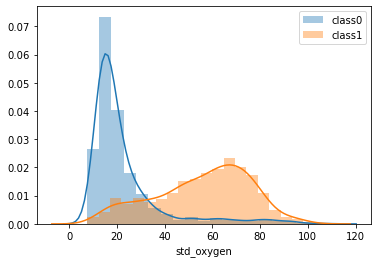

In [75]:
univariate_num_to_class(data, "std_oxygen")

Ako mozme vidiet, tak cukrovkari maju okrem toho, ze viac kyslika v krvi, tak aj nestabilnejsiu hladinu

#### kurtosis_oxygen

count    3965.000000
mean        7.405534
std         4.803379
min        -2.597872
25%         3.631537
50%         7.771753
75%        10.258976
max        34.539844
Name: kurtosis_oxygen, dtype: float64
Skewness: 0.601016622919238
Kurtosis: 1.4111487019490658


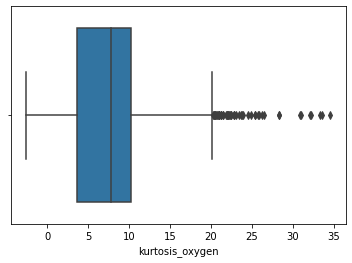

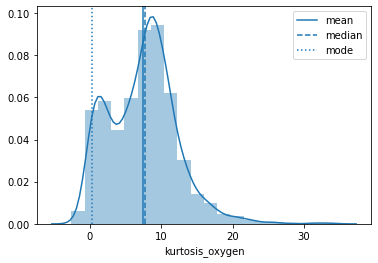

In [76]:
univariate_num(data, "kurtosis_oxygen")

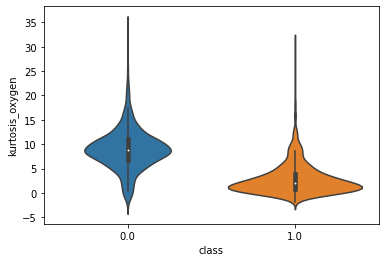

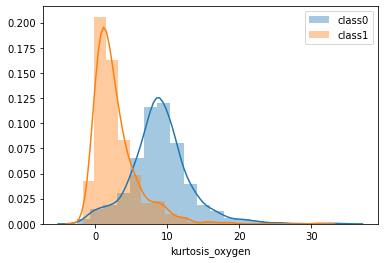

In [77]:
univariate_num_to_class(data, "kurtosis_oxygen")

Toto bolo ocakavane, kedze cukrovkari maju velky std, tak teda dana distribucia bude malo spicata, oproti nie-cukrovkarom, ktori maju stabilnu konkretnu hodnotu hladiny kyslika v krvi (male std)

#### skewness_oxygen

count    3965.000000
mean       91.046280
std       108.251236
min        -1.976976
25%        12.855779
50%        68.299049
75%       126.739185
max      1191.000837
Name: skewness_oxygen, dtype: float64
Skewness: 3.188876061889201
Kurtosis: 18.480512754832816


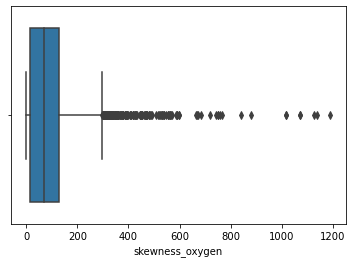

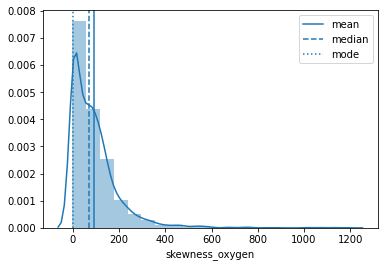

In [78]:
univariate_num(data, "skewness_oxygen")

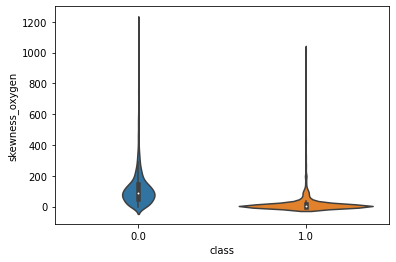

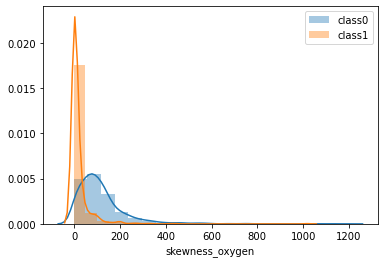

In [79]:
univariate_num_to_class(data, "skewness_oxygen")

## Bivariate Analyza

In [82]:
print(attributes_marcel)

['marital-status', 'pregnant', 'relationship', 'education', 'education-num', 'occupation', 'income', 'fnlwgt', 'workclass', 'hours-per-week', 'capital-gain', 'capital-loss', 'medical_info', 'class']


In [86]:
df2["workclass"].unique()

array([' Self-emp-inc', ' ?', ' Private', ' Self-emp-not-inc',
       ' Federal-gov', ' State-gov', ' Local-gov', nan, ' Never-worked',
       ' Without-pay'], dtype=object)